In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      'accuracy',
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Grade'
img_height = 256
img_width = 256
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 962 images belonging to 4 classes.
Found 238 images belonging to 4 classes.


In [ ]:
history = classifier.fit(train_generator, validation_data = validation_generator,batch_size = batch_size,epochs=18, verbose=1)

Epoch 1/18
181/181 [==============================] - 150s 805ms/step - loss: 0.4045 - accuracy: 0.8083 - precision: 0.8051 - recall: 0.8413 - auc: 0.8987 - val_loss: 0.2608 - val_accuracy: 0.8900 - val_precision: 0.9509 - val_recall: 0.8353 - val_auc: 0.9689
Epoch 2/18
181/181 [==============================] - 146s 806ms/step - loss: 0.2790 - accuracy: 0.8817 - precision: 0.8927 - recall: 0.8825 - auc: 0.9524 - val_loss: 0.2416 - val_accuracy: 0.9184 - val_precision: 0.9229 - val_recall: 0.9229 - val_auc: 0.9665
Epoch 3/18
181/181 [==============================] - 146s 810ms/step - loss: 0.2420 - accuracy: 0.9027 - precision: 0.9090 - recall: 0.9070 - auc: 0.9643 - val_loss: 0.1847 - val_accuracy: 0.9329 - val_precision: 0.9315 - val_recall: 0.9425 - val_auc: 0.9787
Epoch 4/18
181/181 [==============================] - 148s 819ms/step - loss: 0.2312 - accuracy: 0.9046 - precision: 0.9123 - recall: 0.9070 - auc: 0.9673 - val_loss: 0.1839 - val_accuracy: 0.9295 - val_precision: 0.9523

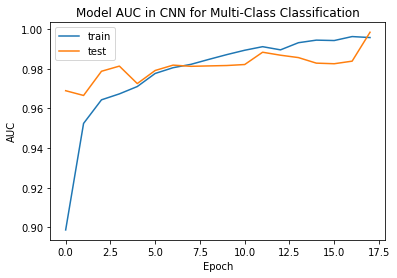

In [ ]:
import matplotlib.pyplot as plt
auc = [0.8987,0.9524,0.9643,0.9673,0.9710,0.9776,0.9805,0.9822,0.9847,0.9871,0.9893,0.9911,0.9895,0.9931,0.9944,0.9942,0.9962,0.9957]
val_auc = [0.9689,0.9665,0.9787,0.9813,0.9725,0.9791,0.9818,0.9812,0.9814,0.9816,0.9821,0.9883,0.9868,0.9856,0.9828,0.9825,0.9838,0.99838]
plt.title('Model AUC in CNN for Multi-Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


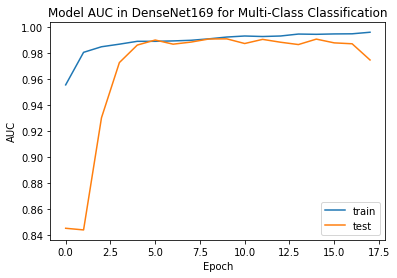

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9557,0.9808,0.9851,0.9871,0.9893,0.9893,0.9896,0.9901,0.9912,0.9926,0.9934,0.9930,0.9934,0.9949,0.9947,0.9950,0.9951,0.9963]
val_auc = [0.84507,0.8438,0.9303,0.9729,0.9864,0.9903,0.9871,0.9887,0.9911,0.9912,0.9876,0.9908,0.9886,0.9868,0.9910,0.9881,0.9874,0.9749]
plt.title('Model AUC in DenseNet169 for Multi-Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


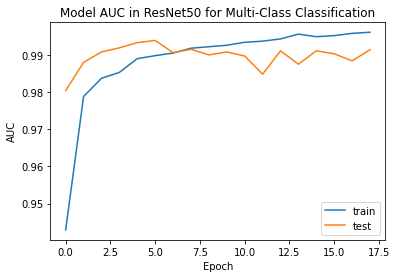

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9429,0.9788,0.9837,0.9853,0.9890,0.9898,0.9905,0.9918,0.9922,0.9926,0.9934,0.9937,0.9943,0.9956,0.9949,0.9952,0.9958,0.9961]
val_auc = [0.9804,0.9880,0.9908,0.9919,0.9933,0.9939,0.9906,0.9915,0.9900,0.9908,0.9897,0.9848,0.9911,0.9875,0.9911,0.9903,0.9884,0.9914]
plt.title('Model AUC in ResNet50 for Multi-Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()

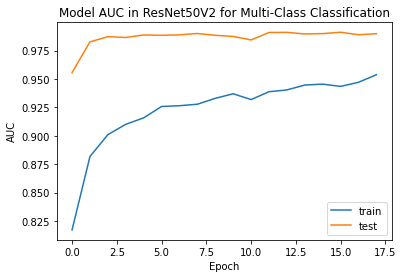

In [ ]:
import matplotlib.pyplot as plt
auc = [0.8171,0.8817,0.9010,0.9101,0.9158,0.9258,0.9265,0.9278,0.9330,0.9370,0.9319,0.9388,0.9404,0.9447,0.9455,0.9435,0.9471,0.9538]
val_auc = [0.9556,0.9827,0.9873,0.9866,0.9888,0.9885,0.9889,0.9901,0.9885,0.9875,0.9844,0.9910,0.9911,0.9897,0.9900,0.9912,0.9890,0.9899]
plt.title('Model AUC in ResNet50V2 for Multi-Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()

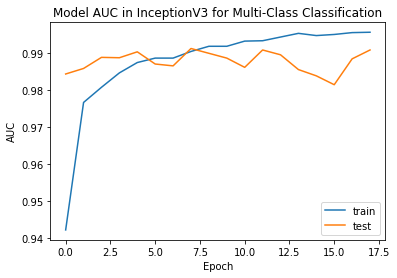

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9422,0.9767,0.9808,0.9847,0.9875,0.9887,0.9887,0.9905,0.9919,0.9919,0.9933,0.9934,0.9944,0.9954,0.9948,0.9951,0.9956,0.9957]
val_auc = [0.9844,0.9859,0.9889,0.9888,0.9904,0.9871,0.9866,0.9913,0.9900,0.9887,0.9862,0.9909,0.9896,0.9856,0.9839,0.9815,0.9885,0.9909]
plt.title('Model AUC in InceptionV3 for Multi-Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()

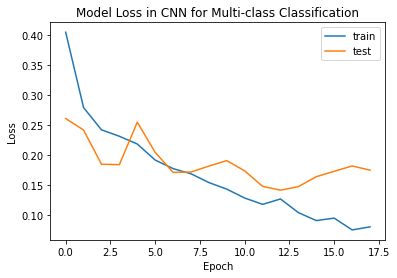

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in CNN for Multi-class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
Xception_train_loss = history.history['loss']
Xception_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/Loss_AveragePooling.png')
pyplot.legend()
pyplot.show()

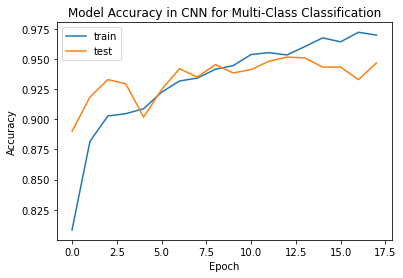

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in CNN for Multi-Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
Xception_train_accuracy = history.history['accuracy']
Xception_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/Acc_AveragePooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 32)       0

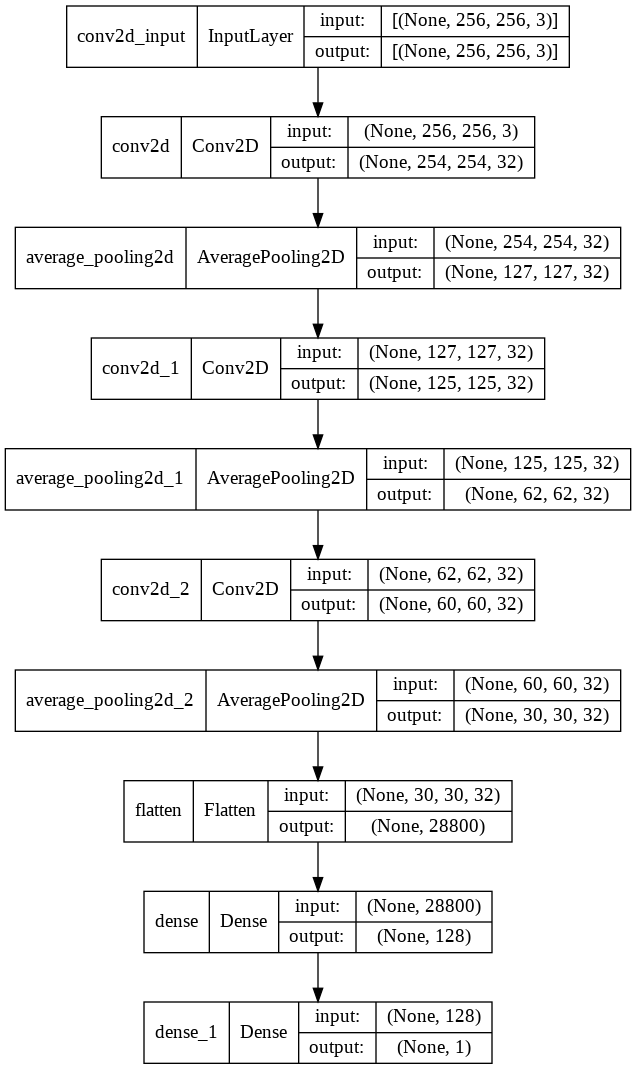

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.404516 	   0.808257 	   0.260821 	   0.890041
       2   0.279003 	   0.881672 	   0.241583 	   0.918396
       3   0.241970 	   0.902747 	   0.184685 	   0.932918
       4   0.231240 	   0.904647 	   0.183942 	   0.929461
       5   0.218356 	   0.908793 	   0.254665 	   0.901798
       6   0.191630 	   0.922439 	   0.204393 	   0.924620
       7   0.177352 	   0.931767 	   0.171108 	   0.941909
       8   0.168745 	   0.934186 	   0.171686 	   0.934993
       9   0.154145 	   0.941441 	   0.181612 	   0.945367
      10   0.143141 	   0.944550 	   0.190676 	   0.938451
      11   0.128367 	   0.953705 	   0.173569 	   0.941217
      12   0.117824 	   0.955260 	   0.147837 	   0.948133
      13   0.126796 	   0.953360 	   0.141432 	   0.951591
      14   0.104008 	   0.960269 	   0.147497 	   0.950899
      15   0.090790 	   0.967525 	   0.163945 	   0.943292
      16   0.094904 	   0.964243 	   0.17291